In [1]:
import io
import os
import sys
import types
import numpy as np
import pandas as pd
import altair as alt
import dropbox

In [2]:
from IPython import get_ipython
from nbformat import read
from IPython.core.interactiveshell import InteractiveShell

In [3]:
def find_notebook(fullname, path=None):
    """find a notebook, given its fully qualified name and an optional path

    This turns "foo.bar" into "foo/bar.ipynb"
    and tries turning "Foo_Bar" into "Foo Bar" if Foo_Bar
    does not exist.
    """
    name = fullname.rsplit('.', 1)[-1]
    if not path:
        path = ['']
    for d in path:
        nb_path = os.path.join(d, name + ".ipynb")
        if os.path.isfile(nb_path):
            return nb_path
        # let import Notebook_Name find "Notebook Name.ipynb"
        nb_path = nb_path.replace("_", " ")
        if os.path.isfile(nb_path):
            return nb_path

In [4]:
class NotebookLoader(object):
    """Module Loader for Jupyter Notebooks"""
    def __init__(self, path=None):
        self.shell = InteractiveShell.instance()
        self.path = path

    def load_module(self, fullname):
        """import a notebook as a module"""
        path = find_notebook(fullname, self.path)

        print ("importing Jupyter notebook from %s" % path)

        # load the notebook object
        with io.open(path, 'r', encoding='utf-8') as f:
            nb = read(f, 4)


        # create the module and add it to sys.modules
        # if name in sys.modules:
        #    return sys.modules[name]
        mod = types.ModuleType(fullname)
        mod.__file__ = path
        mod.__loader__ = self
        mod.__dict__['get_ipython'] = get_ipython
        sys.modules[fullname] = mod

        # extra work to ensure that magics that would affect the user_ns
        # actually affect the notebook module's ns
        save_user_ns = self.shell.user_ns
        self.shell.user_ns = mod.__dict__

        try:
            for cell in nb.cells:
                if cell.cell_type == 'code':
                    # transform the input to executable Python
                    code = self.shell.input_transformer_manager.transform_cell(cell.source)
                    # run the code in themodule
                    exec(code, mod.__dict__)
        finally:
            self.shell.user_ns = save_user_ns
        return mod

In [5]:
class NotebookFinder(object):
    """Module finder that locates Jupyter Notebooks"""
    def __init__(self):
        self.loaders = {}

    def find_module(self, fullname, path=None):
        nb_path = find_notebook(fullname, path)
        if not nb_path:
            return

        key = path
        if path:
            # lists aren't hashable
            key = os.path.sep.join(path)

        if key not in self.loaders:
            self.loaders[key] = NotebookLoader(path)
        return self.loaders[key]

In [6]:
sys.meta_path.append(NotebookFinder())

In [7]:
from datetime import date
from datetime import datetime, timedelta
import RetrieveData as rd_gn
import knmi_gn_001 as gethdd
import Process_Data_CH as prcs
import GetMySQL

importing Jupyter notebook from RetrieveData.ipynb
importing Jupyter notebook from knmi_gn_001.ipynb
importing Jupyter notebook from Process_Data_CH.ipynb
importing Jupyter notebook from GetMySQL.ipynb


In [8]:
df = gethdd.retrieveHDD()

read the csv file with knmi data  knmi_data.csv
last data point in csv file:  2022-03-08 00:00:00
The current time is : 2022-04-10 10:57:08.701751
The number of days since last datapoint is : 33
Update noodzakelijk
data saved to file :  knmi_data.csv
KNMI last datapoint is : 2022-04-09 00:00:00
Current time : 2022-04-10 10:57:09.430922
Elapsed time since  [hours] :  34
Nr rows to add :  1
              SQ       Q    DR    TG    FG     RH        HDD        dow
datetime                                                               
2022-04-06   3.0   375.0  37.0  94.0  63.0   18.0   8.800000  Wednesday
2022-04-07  29.0   873.0  94.0  81.0  84.0  166.0  11.500000   Thursday
2022-04-08  63.0  1328.0  10.0  60.0  43.0    9.0  10.866667     Friday
2022-04-09  80.0  1452.0  35.0  48.0  46.0   48.0  12.266667   Saturday
2022-04-10   0.0     0.0   0.0   0.0   0.0    0.0  14.000000     Sunday


In [9]:
df.tail(20)

,SQ,Q,DR,TG,FG,RH,HDD,dow
datetime,,,,,,,,
2022-03-22,113.0,1528.0,0.0,99.0,14.0,0.0,5.033333,Tuesday
2022-03-23,113.0,1665.0,0.0,92.0,11.0,0.0,5.533333,Wednesday
2022-03-24,113.0,1674.0,0.0,92.0,11.0,0.0,5.533333,Thursday
2022-03-25,95.0,1590.0,0.0,80.0,16.0,0.0,7.066667,Friday
2022-03-26,115.0,1719.0,0.0,95.0,18.0,0.0,5.700000,Saturday
2022-03-27,95.0,1683.0,0.0,84.0,19.0,0.0,6.866667,Sunday
2022-03-28,57.0,1203.0,0.0,70.0,16.0,0.0,8.066667,Monday
2022-03-29,66.0,1354.0,0.0,70.0,18.0,0.0,8.200000,Tuesday
2022-03-30,42.0,1139.0,29.0,49.0,23.0,12.0,10.633333,Wednesday


op energieopwek.nl: 

2022-02-25 4 GW Solar  
2022-02-28 6 GW Solar  
2022-03-01 3 GW Solar  
2022-03-02 7 GW Solar  
2022-03-03 7.5 GW Solar  
2022-03-08 8 GW Solar  

kan natuurlijk wat verschillen als bijv oosten in zon en westen niet of vice versa, weerdata is van Heino

Zet threshold op 60 


Van easyenergy.com


2022-02-25 4 GW Solar  , middagprijs 0.13 vs gemiddeld 0.26     verschlil 0.13  
2022-02-28 6 GW Solar  , middagprijs 0.16 vs gemiddeld 0.29     verschil 0.13  
2022-03-01 3 GW Solar  , middagprijs 0.27 vs gemiddeld 0.30     verschil 0.03 <- too low  
2022-03-02 7 GW Solar , middagprijs 0.22 vs gemiddeld 0.30      verschil 0.08   
2022-03-03 7.5 GW Solar  , middagprijs 0.24 vs gemiddeld 0.40   verschil 0.16  
2022-03-08 8 GW Solar, middagprijs 0.24 vs gemiddeld 0.58       verschil 0.24  

In [10]:
sunratio = df[df['SQ']>60].shape[0] / df.shape[0]
sunratio

0.3065033783783784

30 pct vd de dagen is er voldoende energie om de electriciteitsprijs serieus te verlagen, wellicht binnenkort tot 0 op de piekmomenten.


In [11]:
kWh = 11.25

In [12]:
365*kWh*0.15*sunratio

188.78692461993242

Dit is te weinig


## Wind

Zaterdag 19 feb: gratis stroom begin vd middag



In [13]:
df[df.index=='2022-02-19'] 
#'datetime'

,SQ,Q,DR,TG,FG,RH,HDD,dow
datetime,,,,,,,,
2022-02-19,28.0,548.0,59.0,56.0,74.0,94.0,13.333333,Saturday


<AxesSubplot:>

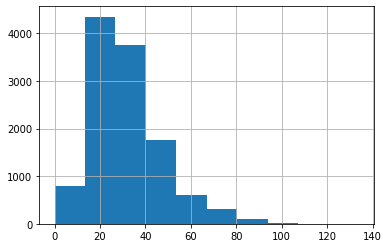

In [14]:
df['FG'].hist()

In [15]:
df[df['FG']>50].tail(12)

,SQ,Q,DR,TG,FG,RH,HDD,dow
datetime,,,,,,,,
2022-02-14,27.0,397.0,0.0,88.0,53.0,-1.0,8.733333,Monday
2022-02-16,0.0,130.0,71.0,108.0,75.0,53.0,8.200000,Wednesday
2022-02-17,63.0,658.0,0.0,81.0,92.0,0.0,12.033333,Thursday
2022-02-18,0.0,153.0,25.0,78.0,88.0,37.0,12.066667,Friday
2022-02-19,28.0,548.0,59.0,56.0,74.0,94.0,13.333333,Saturday
2022-02-20,0.0,106.0,157.0,77.0,76.0,254.0,11.366667,Sunday
2022-02-21,3.0,208.0,52.0,57.0,78.0,94.0,13.500000,Monday
2022-02-24,26.0,506.0,19.0,59.0,55.0,29.0,11.766667,Thursday
2022-04-01,17.0,1052.0,37.0,21.0,53.0,10.0,15.433333,Friday


easyenergy.com


05-02-22 dal 0.09, gem 0.16, verschil 0.07  
06-02-22 dal 0, gemiddel 0.15, verschil 0.15  
16-02-22 dal 0.12, gemiddeld 0.20, verschil 0.08  
17-02-22 dal 0.03, gemiddeld 0.15, verschil 0.12  




In [16]:
# ratio voldoende wind voor dip in prijs
df[df['FG']>45].shape[0]/df.shape[0]

0.1670608108108108

In [17]:
# wind of zon
sunwind_ratio = df[(df['FG']>45)|(df['SQ']>60)].shape[0]/df.shape[0]

In [41]:
sunwind_ratio

0.4467310298102981

In [42]:
365*kWh*0.15*sunwind_ratio

275.1583936737805

In [50]:
savings = pd.DataFrame(np.arange(0,1,0.05),columns= ['delta'])

In [51]:
savings['savings'] = savings['delta']*365*sunwind_ratio*kWh

In [52]:
savings

,delta,savings
0,0.00,0.000000
1,0.05,91.719465
2,0.10,183.438929
3,0.15,275.158394
4,0.20,366.877858
5,0.25,458.597323
6,0.30,550.316787
7,0.35,642.036252
8,0.40,733.755716
9,0.45,825.475181


Conclusie: 
het verschil op de dag moet nog veel groter worden dan dat er nu bestaat.

een verschil van 0.5 euro/kWh geeft een terugverdientijd van ca 7 jaar